In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
## Open payments dataset:
# https://www.cms.gov/priorities/key-initiatives/open-payments/data/dataset-downloads
# This is a 700 Mb download that expands to an 8Gb (text) datafile.

In [3]:
p = pd.read_csv("~/data/OP_DTL_GNRL_PGYR2022_P06302023.csv") 

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_55582/1007669237.py:1: DtypeWarning: Columns (4,8,10,12,15,17,18,20,21,22,23,24,26,32,33,34,35,39,46,47,48,51,52,53,54,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  p = pd.read_csv("~/data/OP_DTL_GNRL_PGYR2022_P06302023.csv")


In [4]:
p.shape

(13148520, 91)

In [5]:
!wc ~/data/OP_DTL_GNRL_PGYR2022_P06302023.csv

 13148521 381021117 8100246870 /Users/wltrimbl/data/OP_DTL_GNRL_PGYR2022_P06302023.csv


In [6]:
p.columns

Index(['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Covered_Recipient_Profile_ID', 'Covered_Recipient_NPI',
       'Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name',
       'Covered_Recipient_Last_Name', 'Covered_Recipient_Name_Suffix',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code',
       'Covered_Recipient_Primary_Type_1', 'Covered_Recipient_Primary_Type_2',
       'Covered_Recipient_Primary_Type_3', 'Covered_Recipient_Primary_Type_4',
       'Covered_Recipient_Primary_Type_5', 'Covered_Recipient_Primary_Type_6',
       'Covered_Recipient_Specialty_1', 'Covered_Recipient_Specialty_2',
       'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
       'Covered_Recipie

In [7]:
q= p[["Total_Amount_of_Payment_USDollars", 'Date_of_Payment', 'Nature_of_Payment_or_Transfer_of_Value',
   'Form_of_Payment_or_Transfer_of_Value']]

(array([1.3148513e+07, 2.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.00000000e-02, 2.53024419e+07, 5.06048839e+07, 7.59073258e+07,
        1.01209768e+08, 1.26512210e+08, 1.51814652e+08, 1.77117093e+08,
        2.02419535e+08, 2.27721977e+08, 2.53024419e+08]),
 <BarContainer object of 10 artists>)

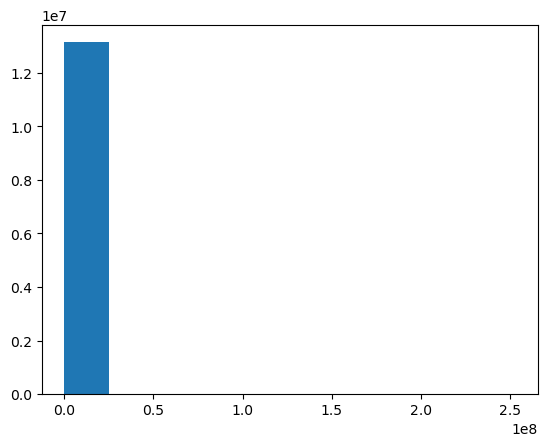

In [9]:
plt.hist(q["Total_Amount_of_Payment_USDollars"])

In [ ]:
# This is a completely unacceptable histogram.

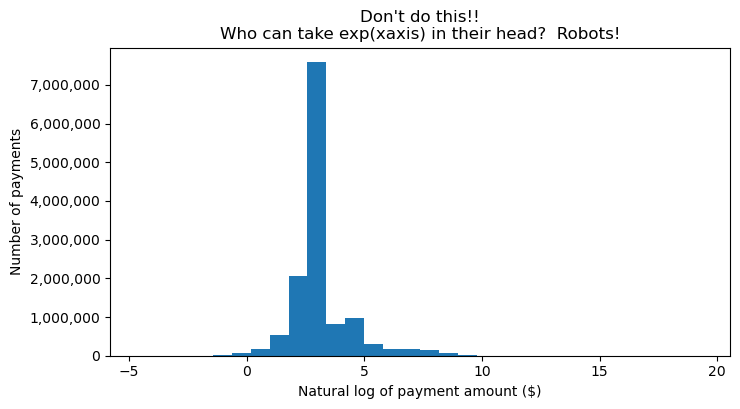

In [82]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("Don't do this!!\nWho can take exp(xaxis) in their head?  Robots!")
plt.xlabel("Natural log of payment amount ($)")
plt.ylabel("Number of payments")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

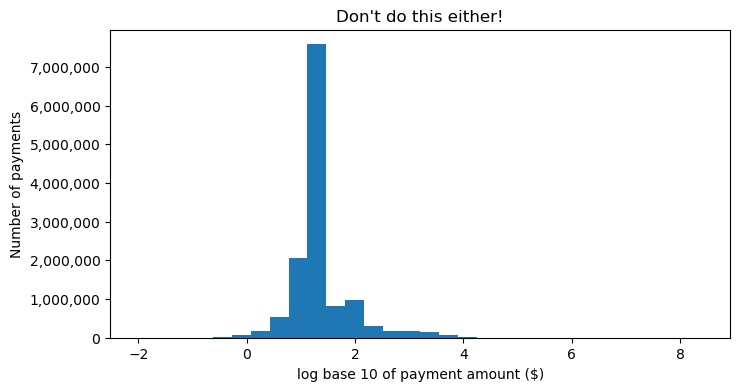

In [53]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log10(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("Don't do this either!")
plt.xlabel("log base 10 of payment amount ($)")
plt.ylabel("Number of payments")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

([<matplotlib.axis.XTick at 0x4655d1090>,
 [Text(-2, 0, '$.01'),
  Text(0, 0, '$1'),
  Text(2, 0, '$100'),
  Text(4, 0, '$10k'),
  Text(6, 0, '$1M'),
  Text(8, 0, '$100M')])

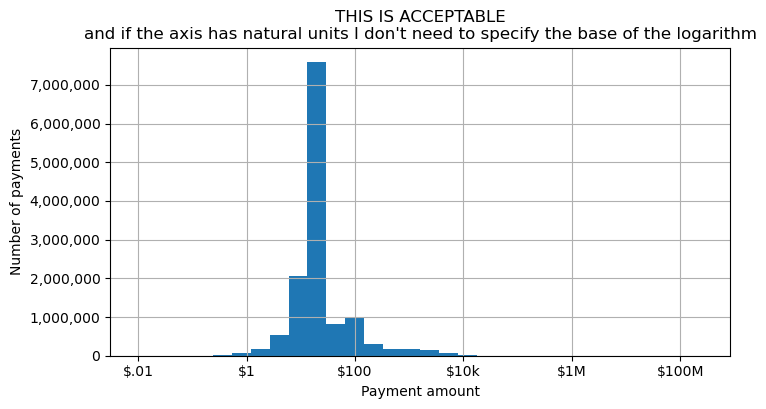

In [83]:
from matplotlib import ticker
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(np.log10(q["Total_Amount_of_Payment_USDollars"]), bins=30)
plt.title("THIS IS ACCEPTABLE\nand if the axis has natural units I don't need to specify the base of the logarithm")
plt.xlabel("Payment amount")
plt.ylabel("Number of payments")
plt.grid()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(np.arange(-2, 9,2), ["$.01", "$1", "$100", "$10k", "$1M", "$100M"]) 

In [11]:
bins = np.power(np.arange(0, 5, 0.25), 10)
bins

array([0.00000000e+00, 9.53674316e-07, 9.76562500e-04, 5.63135147e-02,
       1.00000000e+00, 9.31322575e+00, 5.76650391e+01, 2.69389390e+02,
       1.02400000e+03, 3.32525673e+03, 9.53674316e+03, 2.47358557e+04,
       5.90490000e+04, 1.31472103e+05, 2.75854735e+05, 5.49936667e+05,
       1.04857600e+06, 1.92260160e+06, 3.40506289e+06, 5.84704042e+06])

(array([0.000000e+00, 0.000000e+00, 9.880000e+02, 7.356800e+04,
        1.323834e+06, 9.771957e+06, 1.329441e+06, 2.930850e+05,
        2.413760e+05, 9.284900e+04, 1.411200e+04, 4.057000e+03,
        1.765000e+03, 8.130000e+02, 4.290000e+02, 1.180000e+02,
        5.200000e+01, 2.400000e+01, 2.100000e+01]),
 array([0.00000000e+00, 9.53674316e-07, 9.76562500e-04, 5.63135147e-02,
        1.00000000e+00, 9.31322575e+00, 5.76650391e+01, 2.69389390e+02,
        1.02400000e+03, 3.32525673e+03, 9.53674316e+03, 2.47358557e+04,
        5.90490000e+04, 1.31472103e+05, 2.75854735e+05, 5.49936667e+05,
        1.04857600e+06, 1.92260160e+06, 3.40506289e+06, 5.84704042e+06]),
 <BarContainer object of 19 artists>)

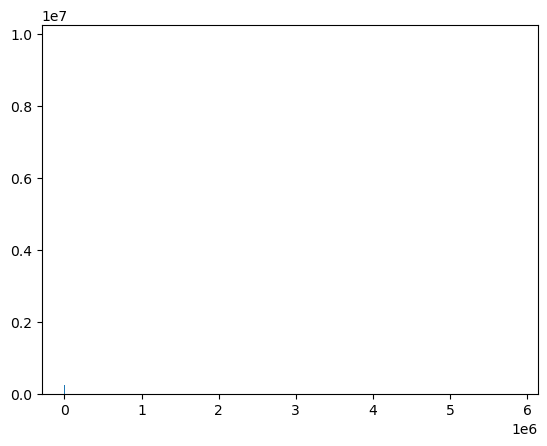

In [12]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)

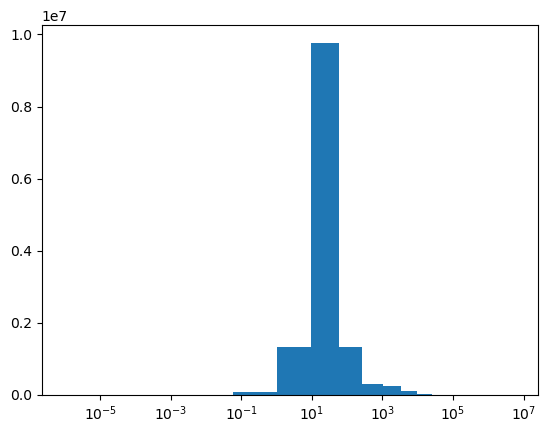

In [13]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)
plt.xscale("log")

In [15]:
q["Nature_of_Payment_or_Transfer_of_Value"].value_counts()

Nature_of_Payment_or_Transfer_of_Value
Food and Beverage                                                                                                                                     12006783
Travel and Lodging                                                                                                                                      464192
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program      227671
Consulting Fee                                                                                                                                          164929
Education                                                                                                                                               158752
Gift                                                                                                                                                     34353
Compens

In [16]:
q.groupby("Nature_of_Payment_or_Transfer_of_Value")['Total_Amount_of_Payment_USDollars'].sum()

Nature_of_Payment_or_Transfer_of_Value
Acquisitions                                                                                                                                          5.143595e+08
Charitable Contribution                                                                                                                               5.407787e+06
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    5.304515e+08
Compensation for serving as faculty or as a speaker for a medical education program                                                                   4.392165e+07
Consulting Fee                                                                                                                                        4.798773e+08
Current or prospective ownership or investment interest                                                                                           

In [18]:
q.groupby("Nature_of_Payment_or_Transfer_of_Value")['Total_Amount_of_Payment_USDollars'].sum()/1E6

Nature_of_Payment_or_Transfer_of_Value
Acquisitions                                                                                                                                           514.359534
Charitable Contribution                                                                                                                                  5.407787
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program     530.451484
Compensation for serving as faculty or as a speaker for a medical education program                                                                     43.921649
Consulting Fee                                                                                                                                         479.877253
Current or prospective ownership or investment interest                                                                                                

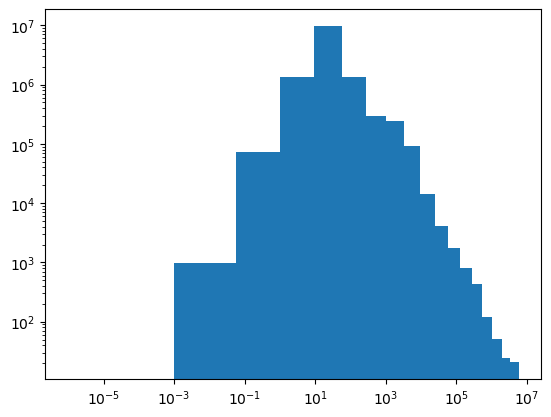

In [19]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins=bins)
plt.xscale("log")
plt.yscale("log")

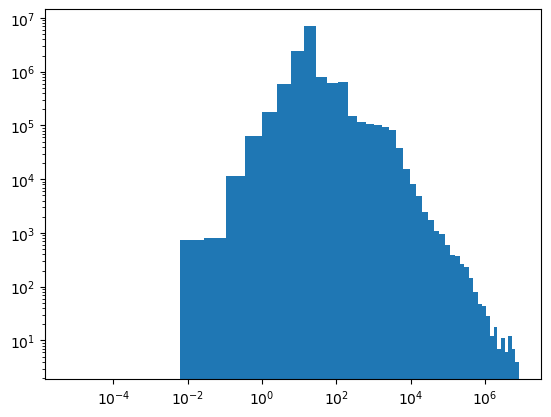

In [22]:

plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10))
plt.xscale("log")
plt.yscale("log")


(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 7.490000e+02,
        8.180000e+02, 1.161500e+04, 6.412100e+04, 1.766390e+05,
        5.932910e+05, 2.393900e+06, 7.133328e+06, 7.958860e+05,
        6.169670e+05, 6.350110e+05, 1.474170e+05, 1.154010e+05,
        1.077660e+05, 1.036360e+05, 9.439000e+04, 8.326700e+04,
        3.768400e+04, 1.521200e+04, 8.105000e+03, 4.813000e+03,
        2.411000e+03, 1.735000e+03, 1.105000e+03, 9.670000e+02,
        5.910000e+02, 3.840000e+02, 3.720000e+02, 2.640000e+02,
        2.300000e+02, 1.460000e+02, 7.900000e+01, 4.800000e+01,
        4.400000e+01, 2.800000e+01, 1.200000e+01, 1.800000e+01,
        7.000000e+00, 1.100000e+01, 6.000000e+00, 1.200000e+01,
        7.000000e+00, 4.000000e+00]),
 array([5.90490000e-06, 1.04857600e-04, 9.76562500e-04, 6.04661760e-03,
        2.82475249e-02, 1.07374182e-01, 3.48678440e-01, 1.00000000e+00,
        2.59374246e+00, 6.19173642e+00, 1.37858492e+01, 2.89254655e+01,
        5.76650391e+01, 1.09951163e+02, 2.

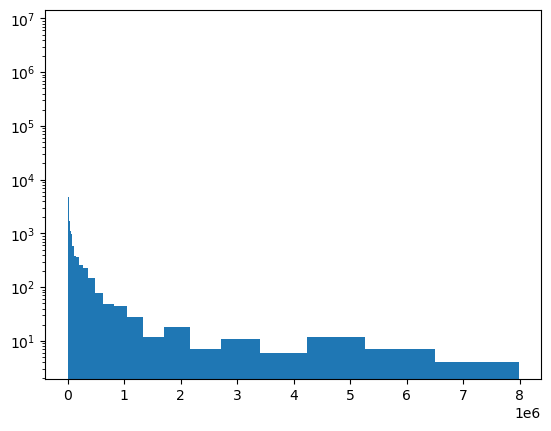

In [29]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10), 
        log=True)


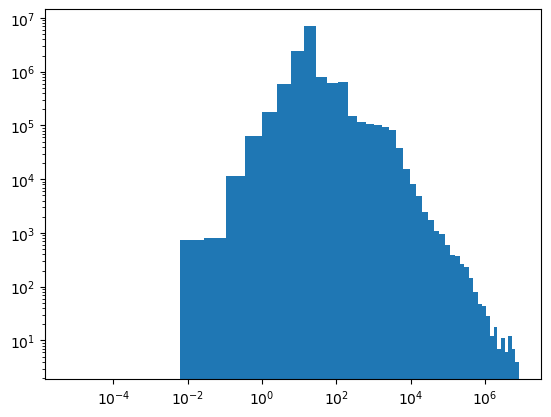

In [30]:
plt.hist(q["Total_Amount_of_Payment_USDollars"], bins= np.power(np.arange(0.3, 5, 0.1), 10), 
        log=True)
plt.xscale("log")

In [ ]:
# Something is funny on the left hand side of this graph: matplotlib 
# doesn't like plotting bars narrower than .01 or something like that.  

In [31]:
import altair as alt
alt.Chart(q.sample(4000)).mark_bar().encode(
    alt.X('Total_Amount_of_Payment_USDollars:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

alt.Chart(...)

In [33]:
import altair as alt
alt.Chart(q.sample(4000)).mark_bar().encode(
    alt.X('Total_Amount_of_Payment_USDollars:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
)

alt.Chart(...)

In [ ]:
# Log-bins in altiar seem to require some .transform() calculations
#  https://github.com/vega/vega-lite/issues/4792

In [71]:
from scipy.stats import uniform, poisson
z = uniform.rvs(-90, 180, size=900)

(array([ 91., 162., 138., 138., 163., 158.]),
 array([-100.,  -70.,  -40.,  -10.,   20.,   50.,   80.]),
 <BarContainer object of 6 artists>)

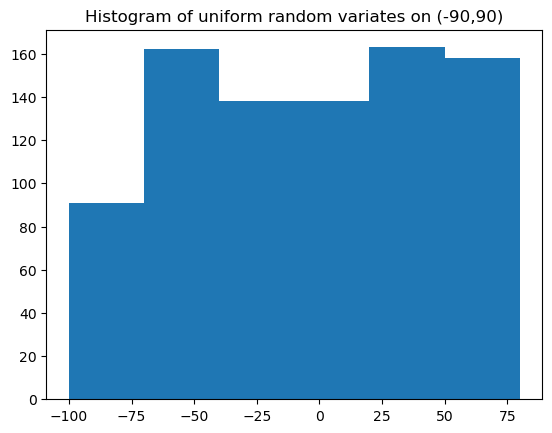

In [79]:
fig, ax=plt.subplots(figsize=(8,4))
plt.title("Histogram of uniform random variates on (-90,90)")
plt.hist(z, bins = np.arange(-100, 100, 30)) 

Text(0.5, 1.0, 'Histogram of uniform random variates on (-90,90)')

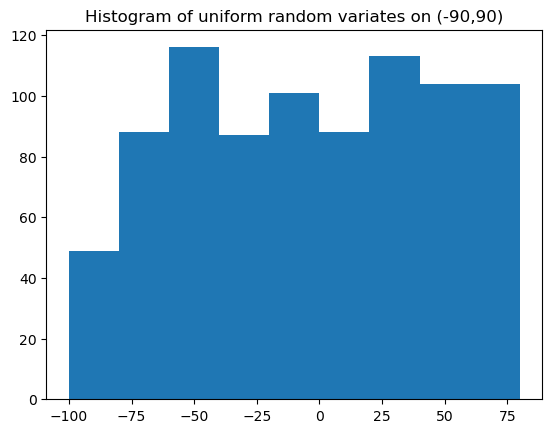

In [78]:
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(z, bins = np.arange(-100, 100, 20)) 
plt.title("Histogram of uniform random variates on (-90,90)")

Text(0.5, 1.0, 'Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?')

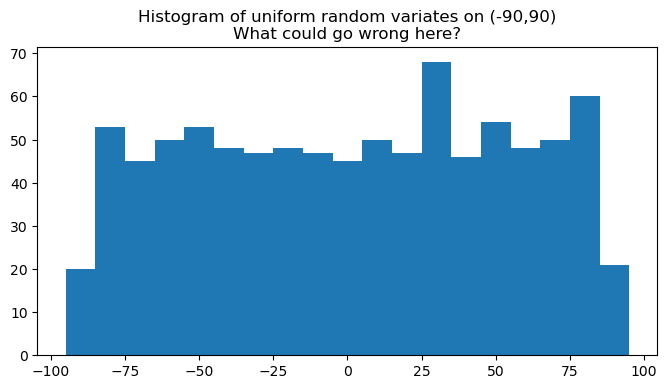

In [80]:
fig, ax=plt.subplots(figsize=(8,4))
plt.hist(z, bins = np.arange(-95, 100, 10))
plt.title("Histogram of uniform random variates on (-90,90)\nWhat could go wrong here?")